# Lecture 5

In [1]:
import pandas as pd
from pandas import Series
import matplotlib
from matplotlib import pyplot as plt
from math import log2
from time import time

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"] = 20

## Helper Functions

In [22]:
def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(f, ax, color='k', **style):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series()
    for i in range(100):
        n = start + width * (i+1)/100
        if type(f) == str:
            y = eval(f)
        else:
            y = f(n)
        s[n] = y
    s.sort_index().plot(ax=ax, color=color, **style)
    if type(f) == str:
        plt.text(s.index[-1], s.iloc[-1], f.upper(), verticalalignment='center')

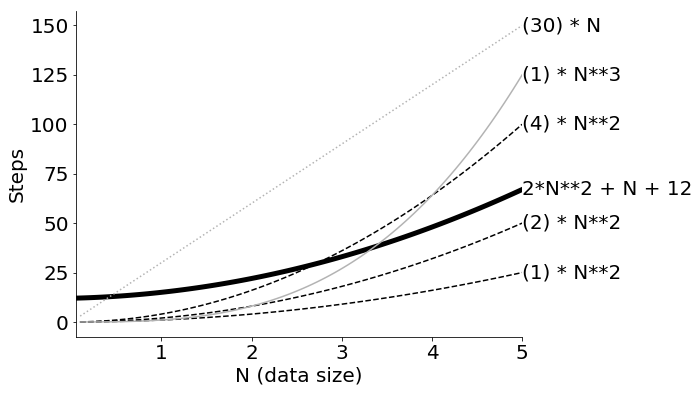

In [68]:
ax = scale_ax()
ax.set_xlim(0, 5)
plot_func("2*n**2 + n + 12", ax, linewidth=5)
plot_func("(1) * n**2", ax, "k", linestyle="--")
plot_func("(2) * n**2", ax, "k", linestyle="--")
plot_func("(4) * n**2", ax, "k", linestyle="--")
plot_func("(1) * n**3", ax, "0.7")
plot_func("(30) * n", ax, "0.7", linestyle=":")

In [69]:
steps = 0
def step():
    global steps
    steps += 1

# assume L is already sorted
def search(L, target):
    left_idx = 0 # inclusive
    right_idx = len(L) # exclusive
    while right_idx - left_idx > 1:
        mid_idx = (right_idx + left_idx) // 2
        mid = L[mid_idx]
        if target >= mid:
            left_idx = mid_idx
        else:
            right_idx = mid_idx
        step()

    return right_idx > left_idx and L[left_idx] == target

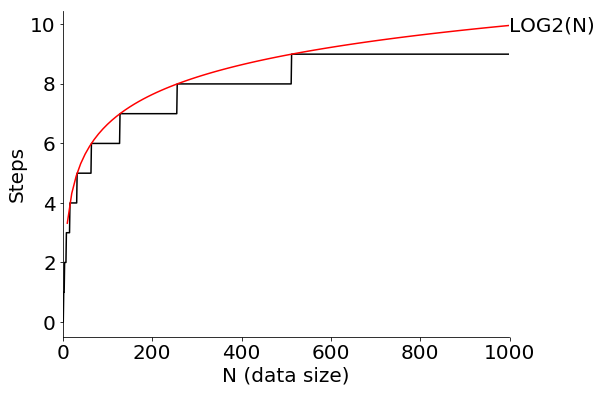

In [78]:
s = Series()
for N in range(1000):
    steps = 0
    L = list(range(N))
    search(L, 0)
    s.loc[N] = steps

ax = s.plot.line(ax=scale_ax(), color="k")
plot_func("log2(n)", ax, "r")